# About the Dataset

In [1]:
## Importing the Packages 
import numpy as np
import cv2

from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [17]:
## Dataset Making and Validation generators
train_dir = r"E:\Face Emotion Dataset\train"
val_dir = r"E:\Face Emotion Dataset\test"



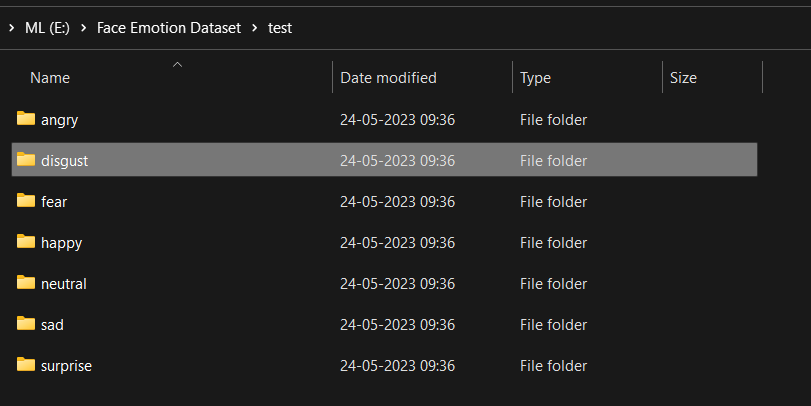

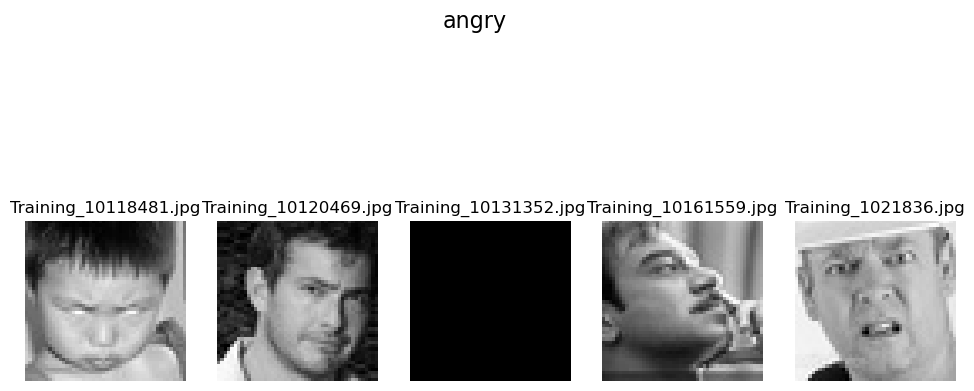

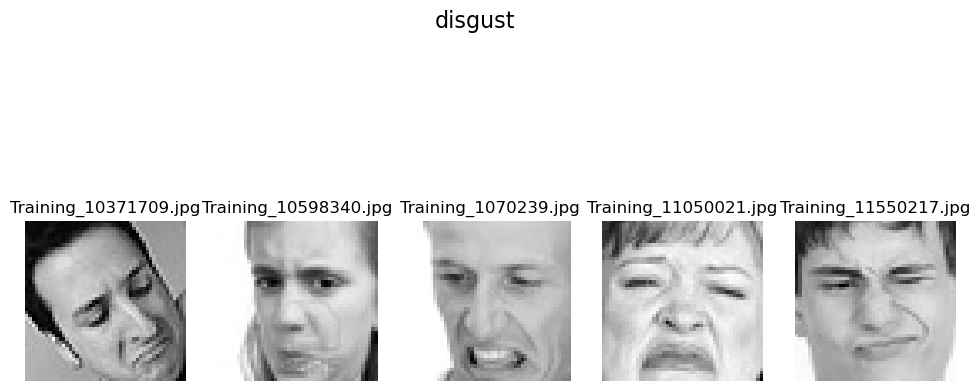

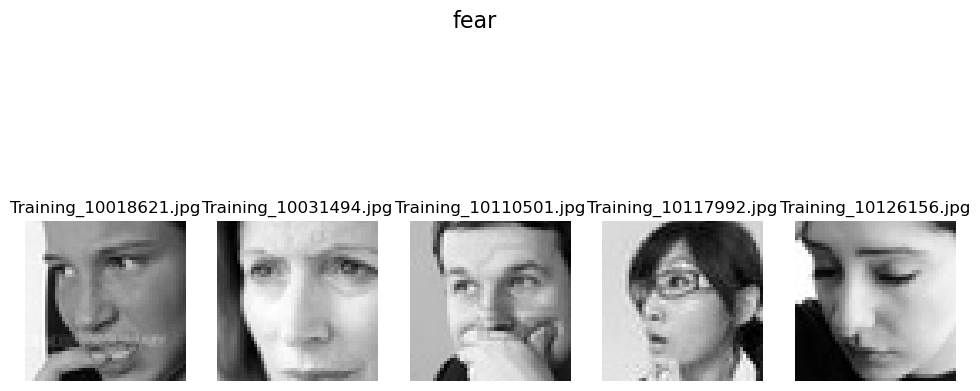

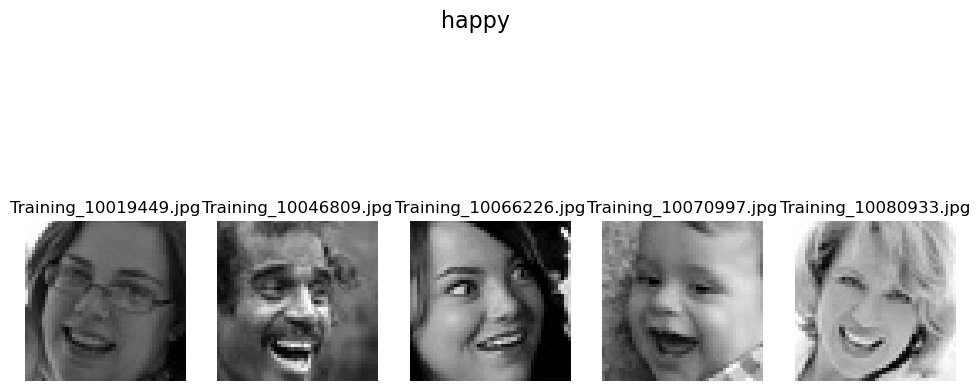

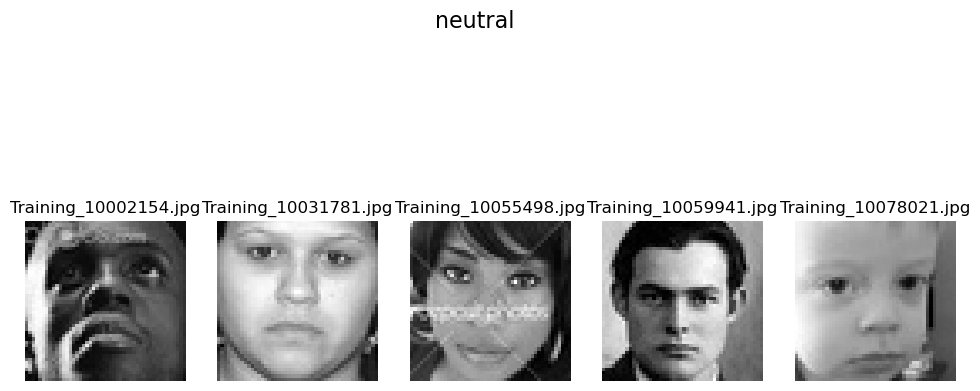

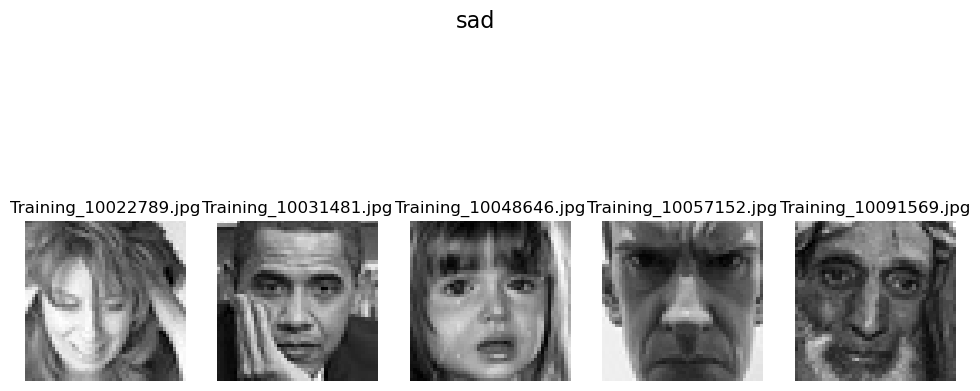

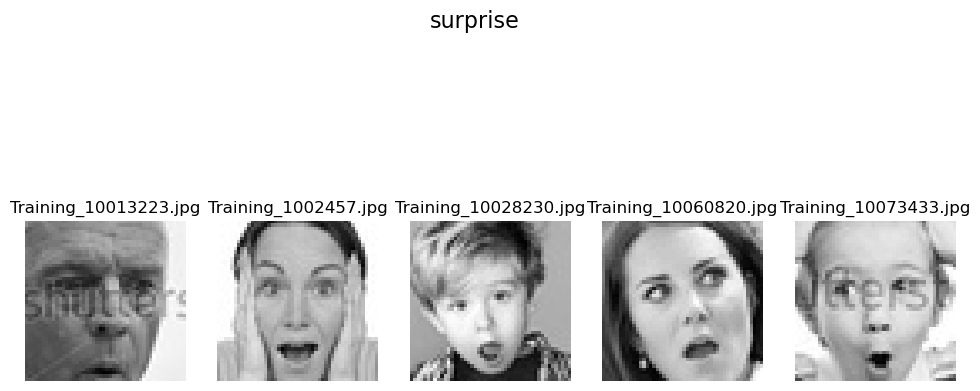

In [18]:
## Visualize the training set 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = r"E:\Face Emotion Dataset\train"

# Function to visualize images for a specific emotion
def visualize_emotion(emotion_dir):
    emotion_images = os.listdir(emotion_dir)[:5]  # Select the first 5 images
    
    plt.figure(figsize=(12, 6))
    plt.suptitle(os.path.basename(emotion_dir), fontsize=16)
    
    for i, image_name in enumerate(emotion_images):
        image_path = os.path.join(emotion_dir, image_name)
        img = mpimg.imread(image_path)
        
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(image_name)
        plt.axis('off')
    
    plt.show()

# Iterate over the emotion categories in the training directory
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for emotion in emotions:
    emotion_dir = os.path.join(train_dir, emotion)
    visualize_emotion(emotion_dir)


In [19]:
#Preprocessing

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Cnn Model


In [2]:
#Build the convolution network architecture:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [8]:
# Compilation
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])



C:\Users\Acer pc\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
## Fitting of the Model

emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

C:\Users\Acer pc\AppData\Local\Temp\ipykernel_11156\2072256151.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 298s 665ms/step - loss: 1.7940 - accuracy: 0.2676 - val_loss: 1.6823 - val_accuracy: 0.3509
Epoch 2/50
448/448 [==============================] - 158s 352ms/step - loss: 1.6210 - accuracy: 0.3680 - val_loss: 1.5351 - val_accuracy: 0.4097
Epoch 3/50
448/448 [==============================] - 150s 335ms/step - loss: 1.5156 - accuracy: 0.4166 - val_loss: 1.4457 - val_accuracy: 0.4515
Epoch 4/50
448/448 [==============================] - 152s 340ms/step - loss: 1.4407 - accuracy: 0.4482 - val_loss: 1.3840 - val_accuracy: 0.4770
Epoch 5/50
448/448 [==============================] - 280s 625ms/step - loss: 1.3856 - accuracy: 0.4727 - val_loss: 1.3419 - val_accuracy: 0.4865
Epoch 6/50
448/448 [==============================] - 174s 389ms/step - loss: 1.3366 - accuracy: 0.4918 - val_loss: 1.3004 - val_accuracy: 0.5082
Epoch 7/50
448/448 [==============================] - 151s 336ms/step - loss: 1.2989 - accuracy: 0.5077 - val_loss: 1.2689 -

In [25]:
emotion_model.save_weights('model.h5')

In [3]:
emotion_model.load_weights('model.h5')

In [9]:
emotion_dict = {
    0: "Angry",
    1: "Disgusted",
    2: "Fearful",
    3: "Happy",
    4: "Neutral",
    5: "Sad",
    6: "Surprised"
}


# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to detect and process faces
# Function to detect and process faces
def detect_faces(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        # Preprocess the face region
        face_roi = gray_frame[y:y+h, x:x+w]
        resized_roi = cv2.resize(face_roi, (48, 48))
        normalized_roi = resized_roi / 255.0
        reshaped_roi = normalized_roi.reshape(1, 48, 48, 1)
        
        # Make prediction using the emotion model
        prediction = emotion_model.predict(reshaped_roi)
        max_index = int(prediction.argmax())
        emotion_label = emotion_dict[max_index]  # Get the emotion label
        
        # Draw bounding box and text label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f"Emotion: {emotion_label}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
    
    return frame


# Function to process video stream
def process_video_stream(url):
    cap = cv2.VideoCapture(url)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.resize(frame, (800, 600))
        
        processed_frame = detect_faces(frame)
        
        cv2.imshow('Video Stream', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    url = 'http://192.168.1.6:8080/video'
    process_video_stream(url)


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


## other Pop up window

In [4]:
import os
# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Emotion dictionary
emotion_dict = {
    0: "Angry",
    1: "Disgusted",
    2: "Fearful",
    3: "Happy",
    4: "Neutral",
    5: "Sad",
    6: "Surprised"
}

# Path to the directory containing emoji images
emoji_dir = "E:\Face Emotion Dataset\emoji_folder"

# Check if the emoji directory exists
if not os.path.exists(emoji_dir):
    print(f"Error: Emoji directory '{emoji_dir}' not found.")
    exit(1)

# Emoji dictionary
emoji_dict = {}
for i in range(len(emotion_dict)):
    emoji_path = os.path.join(emoji_dir, f"{i}.jpg")
    if os.path.exists(emoji_path):
        emoji_dict[i] = emoji_path
    else:
        print(f"Error: Emoji image '{emoji_path}' not found.")
        exit(1)

# Function to detect and process faces
def detect_faces(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        # Preprocess the face region
        face_roi = gray_frame[y:y+h, x:x+w]
        resized_roi = cv2.resize(face_roi, (48, 48))
        normalized_roi = resized_roi / 255.0
        reshaped_roi = normalized_roi.reshape(1, 48, 48, 1)
        
        # Make prediction using the emotion model
        prediction = emotion_model.predict(reshaped_roi)
        max_index = int(prediction.argmax())
        emotion_label = emotion_dict[max_index]  # Get the emotion label
        
        # Draw bounding box and text label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f"Emotion: {emotion_label}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Display the corresponding emoji in a new window
        if max_index in emoji_dict:
            emoji_image = cv2.imread(emoji_dict[max_index])
            cv2.imshow('Emoji', emoji_image)
        else:
            print(f"Error: Emoji image not found for emotion index {max_index}")
    
    return frame

# Function to process video stream
def process_video_stream(url):
    cap = cv2.VideoCapture(url)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.resize(frame, (800, 600))
        
        processed_frame = detect_faces(frame)
        
        cv2.imshow('Video Stream', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    url = 'http://192.168.1.6:8080/video'
    process_video_stream(url)

1/1 [==============================] - 0s 29ms/step


## With emoji

In [11]:
import cv2
import os

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Emotion dictionary
emotion_dict = {
    0: "Angry",
    1: "Disgusted",
    2: "Fearful",
    3: "Happy",
    4: "Neutral",
    5: "Sad",
    6: "Surprised"
}

# Path to the directory containing emoji images
emoji_dir = "E:\Face Emotion Dataset\emoji_folder"

# Check if the emoji directory exists
if not os.path.exists(emoji_dir):
    print(f"Error: Emoji directory '{emoji_dir}' not found.")
    exit(1)

# Emoji dictionary
emoji_dict = {}
for i in range(len(emotion_dict)):
    emoji_path = os.path.join(emoji_dir, f"{i}.jpg")
    if os.path.exists(emoji_path):
        emoji_image = cv2.imread(emoji_path)
        emoji_image = cv2.resize(emoji_image, (48, 48))  # Resize the emoji image
        emoji_dict[i] = emoji_image
    else:
        print(f"Error: Emoji image '{emoji_path}' not found.")
        exit(1)

# Function to detect and process faces
def detect_faces(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        # Preprocess the face region
        face_roi = gray_frame[y:y+h, x:x+w]
        resized_roi = cv2.resize(face_roi, (48, 48))
        normalized_roi = resized_roi / 255.0
        reshaped_roi = normalized_roi.reshape(1, 48, 48, 1)
        
        # Make prediction using the emotion model
        prediction = emotion_model.predict(reshaped_roi)
        max_index = int(prediction.argmax())
        emotion_label = emotion_dict[max_index]  # Get the emotion label
        
        # Draw bounding box and text label on the frame
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f"Emotion: {emotion_label}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Display the corresponding emoji on the frame
        if max_index in emoji_dict:
            emoji_image = emoji_dict[max_index]
            emoji_height, emoji_width, _ = emoji_image.shape
            frame[y:y+emoji_height, x+w:x+w+emoji_width] = emoji_image
        else:
            print(f"Error: Emoji image not found for emotion index {max_index}")
    
    return frame

# Function to process video stream
def process_video_stream(url):
    cap = cv2.VideoCapture(url)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frame = cv2.resize(frame, (800, 600))
        
        processed_frame = detect_faces(frame)
        
        cv2.imshow('Video Stream', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    cap.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    url = 'http://192.168.1.6:8080/video'
    process_video_stream(url)


1/1 [==============================] - 0s 22ms/step


## Considering Eye Also

In [ ]:
import cv2
import numpy as np

# Load the Haar cascade classifiers for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Function to detect and process faces and eyes
def detect_faces_eyes(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Preprocess the face region
        face_roi = gray_frame[y:y+h, x:x+w]
        resized_roi = cv2.resize(face_roi, (48, 48))
        normalized_roi = resized_roi / 255.0
        reshaped_roi = normalized_roi.reshape(1, 48, 48, 1)

        # Make prediction using the emotion model
        prediction = emotion_model.predict(reshaped_roi)
        max_index = int(prediction.argmax())
        emotion_label = emotion_dict[max_index]  # Get the emotion label

        # Draw bounding box and text label on the frame for face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        label = f"Emotion: {emotion_label}"
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Detect eyes within the face region
        eyes = eye_cascade.detectMultiScale(face_roi)
        for (ex, ey, ew, eh) in eyes:
            # Draw bounding box for eyes
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 2)

    return frame

# Function to process video stream
def process_video_stream(url):
    cap = cv2.VideoCapture(url)
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.resize(frame, (800, 600))

        processed_frame = detect_faces_eyes(frame)

        cv2.imshow('Video Stream', processed_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == '__main__':
    url = 'http://192.168.1.6:8080/video'
    process_video_stream(url)


1/1 [==============================] - 0s 22ms/step
